# RFM Segmentation



In [15]:
!pip install gdown
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Dataset

table : order_transaction

Let's download it from Day 5 Transaction Behaviour (https://docs.google.com/spreadsheets/d/1Zv0sPQAPT0Exb1X5g9rujHVbF93OLi7D/edit?usp=sharing&ouid=106388925887876498460&rtpof=true&sd=true)

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
# Google Drive file ID extracted from the link
file_id = '1FsuasubmT32YT1nTuDgyu2i38XiuazFS'

# Construct the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'
# Output file path
output = 'order_transaction.csv'

# Download the file
gdown.download(download_url, output, quiet=False)

# Read the downloaded CSV file using Pandas
import pandas as pd

# Read the CSV file
order_transaction = pd.read_csv('order_transaction.csv')
print(order_transaction.head())

Downloading...
From: https://drive.google.com/uc?id=1FsuasubmT32YT1nTuDgyu2i38XiuazFS
To: /content/order_transaction.csv
100%|██████████| 24.5M/24.5M [00:00<00:00, 47.2MB/s]


               po_number transaction_date  order_id order_status  \
0  PO-2022-12-12-8804434       2022-12-12    463776      Selesai   
1  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
2  PO-2022-12-08-7257980       2022-12-08    461137   Dibatalkan   
3   PO-2022-04-18-108977       2022-04-18    304802      Selesai   
4  PO-2022-12-13-1031978       2022-12-13    465248      Selesai   

  payment_group            payment_method shipping_agency  shipping_cost  \
0           TOP                 mandiriva   Kurir Pribadi              0   
1           TOP                 mps-briva   Kurir Pribadi              0   
2           TOP                 mps-briva   Kurir Pribadi              0   
3           TOP                 mps-briva   Kurir Pribadi              0   
4           TOP  mandiri_va_billing_fixed            self              0   

   total_project_value  voucher_val voucher_code  revenue  \
0             53280000          NaN          NaN   399600   
1           

<ipython-input-17-a5e6dc25aba5>:16: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  order_transaction = pd.read_csv('order_transaction.csv')


In [19]:
order_transaction.head()

,po_number,transaction_date,order_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
0,PO-2022-12-12-8804434,2022-12-12,463776,Selesai,TOP,mandiriva,Kurir Pribadi,0,53280000,NaN,NaN,399600,NaN,NaN,631a5aafaa3096cbda250540
1,PO-2022-10-11-4866339,2022-10-11,426155,Selesai,TOP,mps-briva,Kurir Pribadi,0,78775501,NaN,NaN,590816,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
2,PO-2022-12-08-7257980,2022-12-08,461137,Dibatalkan,TOP,mps-briva,Kurir Pribadi,0,93125670,NaN,NaN,698442,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
3,PO-2022-04-18-108977,2022-04-18,304802,Selesai,TOP,mps-briva,Kurir Pribadi,0,33300000,NaN,NaN,249750,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
4,PO-2022-12-13-1031978,2022-12-13,465248,Selesai,TOP,mandiri_va_billing_fixed,self,0,331890000,0.0,NaN,1659450,631a50655b9755003d24d78a,Kecil,631a56248755a8a9895e1b31


In [20]:
order_transaction.dtypes

po_number               object
transaction_date        object
order_id                 int64
order_status            object
payment_group           object
payment_method          object
shipping_agency         object
shipping_cost            int64
total_project_value      int64
voucher_val            float64
voucher_code            object
revenue                  int64
seller_id               object
seller_category         object
buyer_id                object
dtype: object

In [21]:
order_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159133 entries, 0 to 159132
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   po_number            159133 non-null  object 
 1   transaction_date     159133 non-null  object 
 2   order_id             159133 non-null  int64  
 3   order_status         159133 non-null  object 
 4   payment_group        159133 non-null  object 
 5   payment_method       159133 non-null  object 
 6   shipping_agency      159133 non-null  object 
 7   shipping_cost        159133 non-null  int64  
 8   total_project_value  159133 non-null  int64  
 9   voucher_val          68399 non-null   float64
 10  voucher_code         5160 non-null    object 
 11  revenue              159133 non-null  int64  
 12  seller_id            159127 non-null  object 
 13  seller_category      159127 non-null  object 
 14  buyer_id             159133 non-null  object 
dtypes: float64(1), in

We have some null values on many diffrent columns and for now  let's fill any values with 0

In [22]:
order_transaction = order_transaction.fillna(0)
order_transaction

,po_number,transaction_date,order_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
0,PO-2022-12-12-8804434,2022-12-12,463776,Selesai,TOP,mandiriva,Kurir Pribadi,0,53280000,0.0,0,399600,0,0,631a5aafaa3096cbda250540
1,PO-2022-10-11-4866339,2022-10-11,426155,Selesai,TOP,mps-briva,Kurir Pribadi,0,78775501,0.0,0,590816,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
2,PO-2022-12-08-7257980,2022-12-08,461137,Dibatalkan,TOP,mps-briva,Kurir Pribadi,0,93125670,0.0,0,698442,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
3,PO-2022-04-18-108977,2022-04-18,304802,Selesai,TOP,mps-briva,Kurir Pribadi,0,33300000,0.0,0,249750,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
4,PO-2022-12-13-1031978,2022-12-13,465248,Selesai,TOP,mandiri_va_billing_fixed,self,0,331890000,0.0,0,1659450,631a50655b9755003d24d78a,Kecil,631a56248755a8a9895e1b31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159128,PO-2022-06-16-128661,2022-06-16,140572,Selesai,Direct,BTNATM,self,0,207500,0.0,0,1556,63a94e7cd2c84f87b7e67217,Mikro,631a5b21aa3096cbda2529b2
159129,PO-2022-11-30-4342388,2022-11-30,455045,Selesai,Direct,QREN,biteship_jnt,9000,59000,0.0,0,442,63aa70cbcb47446d5bdef77a,Mikro,63341acf3d78e58aa0429c8e
159130,PO-2022-06-07-123774,2022-06-07,108108,Ditolak Penjual,Direct,bni_ecoll_va,biteship_sicepat,42000,142000,0.0,0,1065,63aa720fcb47446d5bdf1413,Mikro,63aa9cd8e0c8172b92738dfd
159131,PO-2022-07-21-143881,2022-07-21,293510,Selesai,Direct,QREN,self,0,6500,0.0,0,48,63aa832bcb47446d5be0c3dd,Mikro,63ac321ef2bdefdb4a42878e


In [23]:
order_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159133 entries, 0 to 159132
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   po_number            159133 non-null  object 
 1   transaction_date     159133 non-null  object 
 2   order_id             159133 non-null  int64  
 3   order_status         159133 non-null  object 
 4   payment_group        159133 non-null  object 
 5   payment_method       159133 non-null  object 
 6   shipping_agency      159133 non-null  object 
 7   shipping_cost        159133 non-null  int64  
 8   total_project_value  159133 non-null  int64  
 9   voucher_val          159133 non-null  float64
 10  voucher_code         159133 non-null  object 
 11  revenue              159133 non-null  int64  
 12  seller_id            159133 non-null  object 
 13  seller_category      159133 non-null  object 
 14  buyer_id             159133 non-null  object 
dtypes: float64(1), in

#  Create the RFM Table

In [24]:
rfm = order_transaction.copy()

In [25]:
import datetime as dt
NOW = dt.datetime(2023,1,1)

In [26]:
# make the date_placed column datetime
rfm['transaction_date'] = pd.to_datetime(rfm['transaction_date'])

**RFM Variables**

To do RFM segmentation, we need to identify which variables are R, F, and M

- **R**ecency: `transaction_date`
- **F**requency: `order_id`
- **M**onetary: `revenue`

In [27]:
rfm = rfm.groupby('buyer_id').agg({
    'transaction_date': lambda x: (NOW - x.max()).days,  # recency
    'order_id': lambda x: x.nunique(),                   # distinct count for frequency
    'revenue': lambda x: x.sum()                         # monetary
})

rfm['transaction_date'] = rfm['transaction_date'].astype(int)
rfm.rename(columns={
    'transaction_date': 'recency',
    'order_id': 'frequency',
    'revenue': 'monetary'
}, inplace=True)

rfm.head()

,recency,frequency,monetary
buyer_id,,,
631a4da47255a77e0e6d7410,11,60,1575095
631a4f977255a77e0e6dec73,3,110,16697212
631a51497255a77e0e6eb585,3,35,19029058
631a514d7255a77e0e6eb6e5,45,2,17779
631a514e7255a77e0e6eb785,97,1,5857


In [28]:
print("Columns in rfm:", rfm.columns)

Columns in rfm: Index(['recency', 'frequency', 'monetary'], dtype='object')


# RFM Segmentation

RFM works by dividing each RFM variables into categories of equal size ("bins").
To do so, we can use `pd.qcut(df, q=..., labels =...)`

After that, we create a combined score of RFM and interpret each score accordingly.

Let's start with 5 bins of each categories.

## Recency

In [29]:
# For example, let's have a look on recency
pd.qcut(rfm['recency'], q = 5)

buyer_id
631a4da47255a77e0e6d7410     (0.999, 12.0]
631a4f977255a77e0e6dec73     (0.999, 12.0]
631a51497255a77e0e6eb585     (0.999, 12.0]
631a514d7255a77e0e6eb6e5      (25.0, 69.0]
631a514e7255a77e0e6eb785     (69.0, 151.0]
                                 ...      
63b0642410d7d4a770888d88    (151.0, 365.0]
63b0643d10d7d4a770888e72     (0.999, 12.0]
63b0656910d7d4a770889040    (151.0, 365.0]
63b0657e031d7b3fee1ab87d      (25.0, 69.0]
63b0659310d7d4a77088905e    (151.0, 365.0]
Name: recency, Length: 12810, dtype: category
Categories (5, interval[float64, right]): [(0.999, 12.0] < (12.0, 25.0] < (25.0, 69.0] <
                                           (69.0, 151.0] < (151.0, 365.0]]

In [30]:
pd.qcut(rfm['recency'], q = 5).value_counts()

recency
(0.999, 12.0]     2768
(151.0, 365.0]    2549
(69.0, 151.0]     2525
(25.0, 69.0]      2519
(12.0, 25.0]      2449
Name: count, dtype: int64

In [31]:
rfm['frequency'].value_counts().sort_index()

frequency
1       4471
2       1710
3        655
4        554
5        651
        ... 
840        1
975        1
1563       1
1752       1
2207       1
Name: count, Length: 243, dtype: int64

If we divide it by 5, we divide it into the 20, 40, 60, 80 and 100

## Frequency

In [32]:
rfm['frequency'].quantile([0.2, 0.4, 0.6, 0.8, 1])

0.2       1.0
0.4       2.0
0.6       5.0
0.8      12.0
1.0    2207.0
Name: frequency, dtype: float64

In [33]:
rfm['frequency'].value_counts()

frequency
1       4471
2       1710
6        727
3        655
5        651
        ... 
374        1
1563       1
192        1
184        1
148        1
Name: count, Length: 243, dtype: int64

In [34]:
pd.qcut(rfm['frequency'], q = 5, duplicates='drop')

buyer_id
631a4da47255a77e0e6d7410    (12.0, 2207.0]
631a4f977255a77e0e6dec73    (12.0, 2207.0]
631a51497255a77e0e6eb585    (12.0, 2207.0]
631a514d7255a77e0e6eb6e5      (0.999, 2.0]
631a514e7255a77e0e6eb785      (0.999, 2.0]
                                 ...      
63b0642410d7d4a770888d88      (0.999, 2.0]
63b0643d10d7d4a770888e72      (0.999, 2.0]
63b0656910d7d4a770889040      (0.999, 2.0]
63b0657e031d7b3fee1ab87d      (0.999, 2.0]
63b0659310d7d4a77088905e      (0.999, 2.0]
Name: frequency, Length: 12810, dtype: category
Categories (4, interval[float64, right]): [(0.999, 2.0] < (2.0, 5.0] < (5.0, 12.0] < (12.0, 2207.0]]

In [35]:
# Here the qcut is not cut nicely because a lot of clients buyer transact 5x
pd.qcut(rfm['frequency'], q = 5, duplicates='drop').value_counts()

frequency
(0.999, 2.0]      6181
(12.0, 2207.0]    2394
(5.0, 12.0]       2375
(2.0, 5.0]        1860
Name: count, dtype: int64

## Monetary

In [36]:
# Here the qcut is not cut nicely because a lot of clients transact 5x
pd.qcut(rfm['monetary'], q = 5, duplicates='drop').value_counts()

monetary
(-0.001, 750.0]            2601
(2296.2, 21177.4]          2562
(21177.4, 765395.0]        2562
(765395.0, 471524016.0]    2562
(750.0, 2296.2]            2523
Name: count, dtype: int64

To simplify the RFM score, let's assign a number of each bins

**RECENCY**
- (0.999, 12.0] : 5 (the best)
- (12.0, 25.0] : 4
- (25.0, 69.0] : 3
- (69.0, 151.0] : 2
- (151.0, 365.0] : (the worst)

**FREQUENCY**
- (0.999, 2.0] : 1 (the worst)
- (2.0, 5.0] : 2
- (5.0, 12.0] : 3
- (12.0, 2207.0] : 4 (the best)

**MONETARY**
- (-0.001, 750.0] : 1 (the worst)
- (750.0, 2296.2] : 2
- (2296.2, 21177.4] : 3
- (21177.4, 765395.0] : 4
-  (765395.0, 471524016.0] : 5 (the best)

In [37]:
# Create RFM score
rfm['r_score'] = pd.qcut(rfm['recency'], q = 5, labels = ['5', '4','3','2','1'])
rfm['f_score'] = pd.qcut(rfm['frequency'], q = 5, duplicates = 'drop', labels = ['1','2','3', '4'])
rfm['m_score'] = pd.qcut(rfm['monetary'], q = 5, labels = ['1','2','3','4','5'])

# Combine all scores
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
buyer_id,,,,,,,
631a4da47255a77e0e6d7410,11,60,1575095,5,4,5,545
631a4f977255a77e0e6dec73,3,110,16697212,5,4,5,545
631a51497255a77e0e6eb585,3,35,19029058,5,4,5,545
631a514d7255a77e0e6eb6e5,45,2,17779,3,1,3,313
631a514e7255a77e0e6eb785,97,1,5857,2,1,3,213
...,...,...,...,...,...,...,...
63b0642410d7d4a770888d88,282,1,774,1,1,2,112
63b0643d10d7d4a770888e72,4,1,774,5,1,2,512
63b0656910d7d4a770889040,179,1,774,1,1,2,112


In [38]:
# Reset index to make 'buyer_id' a regular column
rfm.reset_index(inplace=True)

# Include the "buyer_id" column
rfm = rfm[['buyer_id', 'recency', 'frequency', 'monetary', 'r_score', 'f_score', 'm_score', 'rfm_score']]

rfm.head()

,buyer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,631a4da47255a77e0e6d7410,11,60,1575095,5,4,5,545
1,631a4f977255a77e0e6dec73,3,110,16697212,5,4,5,545
2,631a51497255a77e0e6eb585,3,35,19029058,5,4,5,545
3,631a514d7255a77e0e6eb6e5,45,2,17779,3,1,3,313
4,631a514e7255a77e0e6eb785,97,1,5857,2,1,3,213


In [39]:
# Check the columns in the DataFrame
column_names = rfm.columns
print(column_names)

Index(['buyer_id', 'recency', 'frequency', 'monetary', 'r_score', 'f_score',
       'm_score', 'rfm_score'],
      dtype='object')


# Interpreting RFM Segmentation

Let's first check the most common RFM score

In [40]:
rfm['rfm_score'].value_counts()

rfm_score
545    1309
111    1142
112     750
211     706
212     598
       ... 
244       3
121       2
521       2
135       1
243       1
Name: count, Length: 81, dtype: int64

Seems like the biggest group is the 545 score, which is the worst in all variables.

However, we typically do not interpret the RFM score by the score only. We typically map with a predefined segments (example: https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/edit?usp=sharing)

In [41]:
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/edit#gid=884117664'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')
rfm_segment = pd.read_csv(GSHEET_URL_CSV)

rfm_segment['rfm_score'] = rfm_segment['rfm_score'].astype(str)
rfm_segment

,rfm_score,segment,Activity,Actionable
0,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
1,554,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
2,544,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
3,545,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
4,454,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
...,...,...,...,...
120,112,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
121,121,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
122,131,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
123,141,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."


In [42]:
# Let's merge the score and the segment definition
rfm2 = rfm.merge(rfm_segment, how='left', left_on = 'rfm_score', right_on = 'rfm_score')
rfm2

,buyer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,segment,Activity,Actionable
0,631a4da47255a77e0e6d7410,11,60,1575095,5,4,5,545,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
1,631a4f977255a77e0e6dec73,3,110,16697212,5,4,5,545,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
2,631a51497255a77e0e6eb585,3,35,19029058,5,4,5,545,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
3,631a514d7255a77e0e6eb6e5,45,2,17779,3,1,3,313,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
4,631a514e7255a77e0e6eb785,97,1,5857,2,1,3,213,About To Sleep,"Below average recency, frequency and monetary ...","Share valuable resources, recommend popular pr..."
...,...,...,...,...,...,...,...,...,...,...,...
12805,63b0642410d7d4a770888d88,282,1,774,1,1,2,112,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
12806,63b0643d10d7d4a770888e72,4,1,774,5,1,2,512,Recent Customers,"Bought most recently, but not often.","Provide on-boarding support, give them early s..."
12807,63b0656910d7d4a770889040,179,1,774,1,1,2,112,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
12808,63b0657e031d7b3fee1ab87d,59,1,774,3,1,2,312,About To Sleep,"Below average recency, frequency and monetary ...","Share valuable resources, recommend popular pr..."


# Segmentation Group

In [43]:
# Let's check the biggest segmentation group
rfm2['segment'].value_counts()

segment
Champions                      1994
Hibernating                    1913
Lost                           1894
Potential Loyalist             1335
Recent Customers               1187
Customers Needing Attention    1102
Promising                       936
Can’t Lose Them                 774
About To Sleep                  640
Loyal Customers                 640
At Risk                         395
Name: count, dtype: int64

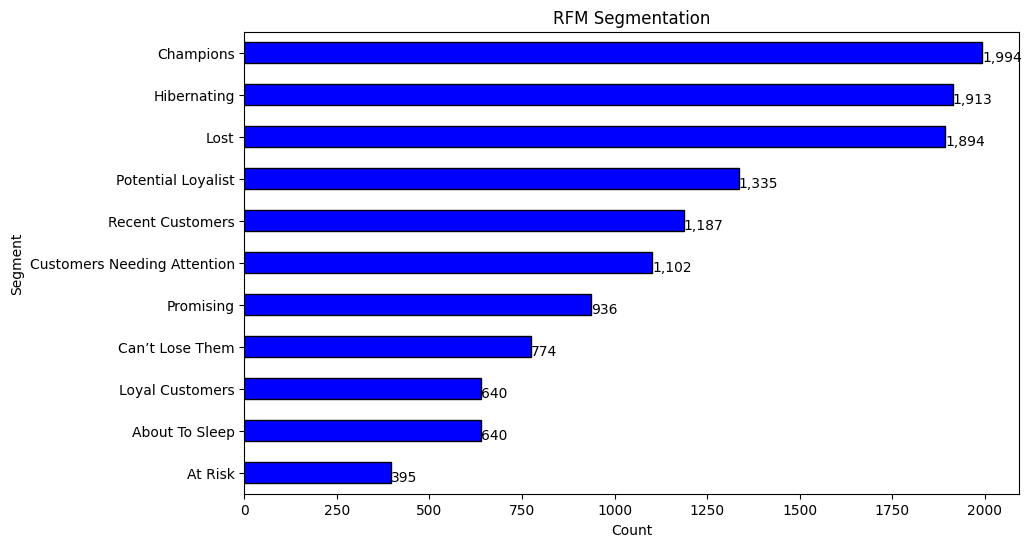

In [44]:
segment_counts = rfm2['segment'].value_counts()

# Sorting segments by counts in ascending order
sorted_segments = segment_counts.sort_values(ascending=True)

# Plotting the sorted horizontal bar chart with count labels
plt.figure(figsize=(10, 6))
bars = sorted_segments.plot(kind='barh', color='blue', edgecolor='black')

# Adding count annotations to each bar
for bar in bars.patches:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2 - 0.1,
             f'{bar.get_width():,.0f}', ha='left', va='center')

plt.title('RFM Segmentation')
plt.xlabel('Count')


plt.ylabel('Segment')
plt.show()

In [45]:
# Let's check the biggest segmentation group
rfm2['Actionable'].value_counts()

Actionable
Reward them. Can be early adopters for new products. Will promote your brand.                        1994
Offer other relevant products and special discounts. Recreate brand value.                           1913
Revive interest with reach out campaign, ignore otherwise.                                           1894
Offer membership / loyalty program, recommend other products.                                        1335
Provide on-boarding support, give them early success, start building relationship.                   1187
Make limited time offers, Recommend based on past purchases. Reactivate them.                        1102
Create brand awareness, offer free trials                                                             936
Win them back via renewals or newer products, don’t lose them to competition, talk to them.           774
Share valuable resources, recommend popular products / renewals at discount, reconnect with them.     640
Upsell higher value products. Ask f

**The top 5 of segment our buyer :**
1. Champions
2. Hibernating
3. Lost
4. Potential Loyalist
5. Recent Customers

**The top 5 action seems to be to create :**
1. Reward them. Can be early adopters for new products. Will promote your brand
2. Offer other relevant products and special discounts. Recreate brand value
3. Revive interest with reach out campaign, ignore otherwise
4.Offer membership / loyalty program, recommend other products.
4. Provide on-boarding support, give them early success, start building relationship.  

We will see in the next week how we can better recommend loan to our customers

In [46]:
print("Columns in order_transaction:", order_transaction.columns)
print("Columns in rfm2:", rfm2.columns)

Columns in order_transaction: Index(['po_number', 'transaction_date', 'order_id', 'order_status',
       'payment_group', 'payment_method', 'shipping_agency', 'shipping_cost',
       'total_project_value', 'voucher_val', 'voucher_code', 'revenue',
       'seller_id', 'seller_category', 'buyer_id'],
      dtype='object')
Columns in rfm2: Index(['buyer_id', 'recency', 'frequency', 'monetary', 'r_score', 'f_score',
       'm_score', 'rfm_score', 'segment', 'Activity', 'Actionable'],
      dtype='object')


In [48]:
# Export the DataFrame to a CSV file
rfm2.to_csv('rfm2.csv', index=False)